In [30]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import pickle
import sklearn.metrics as metrics

#Steps from https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d

In [31]:
df = pd.read_csv("C:\\Users\\corts033\\Documents\\Personal\\Geo Tech\\CSE 6242\\Project\\cleaned_movies_NEW.csv")

In [32]:
df.columns

Index(['budget', 'homepage', 'movie_id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'release_year', 'release_month', 'day_of_week_release', 'has_homepage',
       'num_spoken_languages', 'num_production_companies', 'num_genres',
       'genre_Horror', 'genre_War', 'genre_Adventure', 'genre_Western',
       'genre_Comedy', 'genre_Mystery', 'genre_Romance',
       'genre_Science_Fiction', 'genre_Action', 'genre_Thriller',
       'genre_Crime', 'genre_TV_Movie', 'genre_Animation', 'genre_Foreign',
       'genre_Fantasy', 'genre_Drama', 'genre_Documentary', 'genre_Family',
       'genre_Music', 'genre_History', 'keywords_list',
       'production_companies_list', 'production_countries_list', 'cast_size',
       'cast_member_list', 'cast_1', 'cast_2', 'cast_3', 'cast_4', 'cast_5',
       'cpi', 'revenue_adjusted', 'holiday_release', 'cast_1_vote_averag

In [38]:
df.drop_duplicates(keep='first', inplace=True)
y = df[['revenue_adjusted']]
print(y[1:100])
X = df[['budget','runtime',
        'jan_release','feb_release','mar_release','apr_release','may_release',
       'jun_release','jul_release','aug_release','sep_release','oct_release',
       'nov_release','dec_release','sun_release','mon_release','tue_release',
       'wed_release','thur_release','fri_release','sat_release',
        'genre_Horror', 'genre_War',
       'genre_Adventure', 'genre_Western', 'genre_Comedy', 'genre_Mystery',
       'genre_Romance', 'genre_Science_Fiction', 'genre_Action',
       'genre_Thriller', 'genre_Crime', 'genre_TV_Movie', 'genre_Animation',
       'genre_Foreign', 'genre_Fantasy', 'genre_Drama', 'genre_Documentary',
       'genre_Family', 'genre_Music', 'genre_History','cast_size','holiday_release', 'cast_1_vote_average',
       'cast_1_movie_count', 'cast_2_vote_average', 'cast_2_movie_count',
       'cast_3_vote_average', 'cast_3_movie_count', 'cast_4_vote_average',
       'cast_4_movie_count', 'cast_5_vote_average', 'cast_5_movie_count',
       'keywords_holiday_celebrate', 'keywords_violence_war_crime',
       'keywords_superhero', 'keywords_creditstinger_3d',
       'keywords_womandirector_independentfilm',
       'keywords_future_robots_aliens',
       'keywords_edgy_alcohol_drug_sex_nudity', 'keywords_music',
       'keywords_animal_nature']]
X = X.fillna(0)

cols = X.columns
X_orig = X
y_orig=y

#Feature scaling basically helps to normalize the data within a particular range. Normally several common class types contain the feature scaling function so that they make feature scaling automatically. 
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


#scaler = MinMaxScaler()
#scaler.fit(X)

#X = pd.DataFrame(scaler.transform(X), columns=cols)

     revenue_adjusted
1        1.356688e+09
2        1.087407e+09
3        1.382932e+09
4        3.621816e+08
5        1.257685e+09
..                ...
102      1.107955e+09
103      9.389074e+07
104      1.301563e+09
105      3.425335e+08
106      4.539040e+08

[99 rows x 1 columns]


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)
#X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_orig, y_orig, train_size=0.80, test_size=0.20, random_state=42)

In [47]:
#Run SVR regression using Gausian approach
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

#predict train score
test_pred = regressor.predict(X_train)
#predict test score
test_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform ((regressor.predict (sc_X.transform(np.array([[6.5]])))))

print(f"Training Score: {regressor.score(X_train, y_train)}")
print(f"Validation Score: {regressor.score(X_test, y_test)}")
#print(test_pred)

C:\Users\corts033\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.750286511066433
Validation Score: 0.3841411694313669


In [48]:
#Run SVR regression using polynomial regressor approach
regressor_p = SVR(kernel = 'poly')
regressor_p.fit(X_train, y_train)
filename = 'C:\\Users\\corts033\\Documents\\Personal\\Geo Tech\\CSE 6242\\Project\\SVR.pkl'
pickle.dump(regressor_p, open(filename, 'wb'))
#predict train score
test_pred = regressor_p.predict(X_train)
#predict test score
test_pred = regressor_p.predict(X_test)

print(f"Training Score: {regressor_p.score(X_train, y_train)}")
print(f"Validation Score: {regressor_p.score(X_test, y_test)}")

C:\Users\corts033\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.8309424049377737
Validation Score: 0.39810994890738116


In [49]:
#Run SVR regression using linear regressor approach
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)
#predict train score
test_pred = regressor.predict(X_train)
#predict test score
test_pred = regressor.predict(X_test)

print(f"Training Score: {regressor.score(X_train, y_train)}")
print(f"Validation Score: {regressor.score(X_test, y_test)}")

C:\Users\corts033\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.46727083597614816
Validation Score: 0.35671928303837674


2533
2533
0.7505131526512686
-0.06404193287597995


C:\Users\corts033\AppData\Local\Temp\1\ipykernel_10304\2269820127.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = [float(i) for i in y_train]


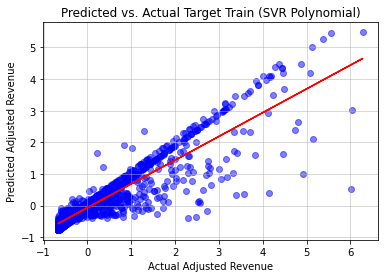

In [16]:
#The best model is poly, this will be used to draw the comparisson between predicted vs actual


y_train_pred = regressor_p.predict(X_train)

#y_train = [item for sublist in y_train for item in sublist]
y_train = [float(i) for i in y_train]
print(len(y_train))
print(len(y_train_pred))
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue')
#print([item for sublist in y_train for item in sublist][0:3])
#print(y_train_pred[0:3])

m, b = np.polyfit(y_train, y_train_pred, 1)
print(m)
print(b)
line_plot = [(m*(i)) + b for i in y_train]
plt.plot(y_train, line_plot, color='red')

plt.xlabel('Actual Adjusted Revenue')
plt.ylabel('Predicted Adjusted Revenue')
plt.title('Predicted vs. Actual Target Train (SVR Polynomial)')
plt.grid(linewidth=0.5)

634
634
0.34924829601583185
-0.09281690700039084


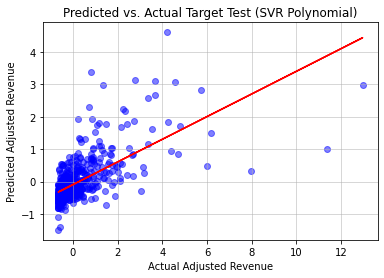

In [17]:
#The best model is poly, this will be used to draw the comparisson between predicted vs actual


y_test_pred = regressor_p.predict(X_test)

y_test = [item for sublist in y_test for item in sublist]
#y_test = [float(i) for i in y_test]
print(len(y_test))
print(len(y_test_pred))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
#print([item for sublist in y_train for item in sublist][0:3])
#print(y_train_pred[0:3])

m, b = np.polyfit(y_test, y_test_pred, 1)
print(m)
print(b)
line_plot = [(m*(i)) + b for i in y_test]
plt.plot(y_test, line_plot, color='red')

plt.xlabel('Actual Adjusted Revenue')
plt.ylabel('Predicted Adjusted Revenue')
plt.title('Predicted vs. Actual Target Test (SVR Polynomial)')
plt.grid(linewidth=0.5)

In [59]:
#Sklearn provides the number of metrics to evaluate accuracy. The next method is to calculate metrics with sklearn functions.
y_test_pred = y_test_pred.reshape(-1,1)
y_pred = sc_y.inverse_transform(y_test_pred)
y_test_orig = sc_y.inverse_transform(y_test)
print(len(y_test_pred))
print(len(y_pred))
print(len(y_test_orig))
mae = metrics.mean_absolute_error(y_test_orig, y_pred)
mse = metrics.mean_squared_error(y_test_orig, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test_orig, y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

634
634
634
Results of sklearn.metrics:
MAE: 129259468.6078267
MSE: 7.250303882045358e+16
RMSE: 269263883.2455136
R-Squared: 0.39810994890738116


634
0.3492482960158322
95177457.17756258


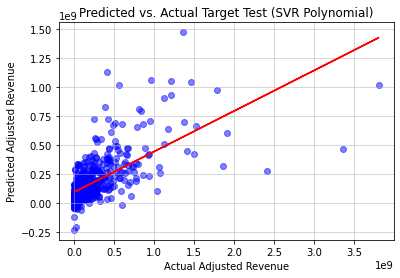

In [65]:

#y_test_pred = regressor_p.predict(X_test)

y_test_orig = [item for sublist in y_test_orig for item in sublist]
#y_pred = [float(i) for i in y_pred]
print(len(y_pred))
#print(len(y_test_pred))
plt.scatter(y_test_orig, y_pred, alpha=0.5, color='blue')
#print([item for sublist in y_train for item in sublist][0:3])
#print(y_train_pred[0:3])

m, b = np.polyfit(y_test_orig, y_pred, 1)
print(m)
print(b)
line_plot = [(m*(i)) + b for i in y_test_orig]
plt.plot(y_test_orig, line_plot, color='red')

plt.xlabel('Actual Adjusted Revenue')
plt.ylabel('Predicted Adjusted Revenue')
plt.title('Predicted vs. Actual Target Test (SVR Polynomial)')
plt.grid(linewidth=0.5)